# Basic Image Classification: Classify Images of Handwritten Digits

This notebool trains a neural network model to classify images of number.
This notebook uses tf.keras, a high-level API to build and train models in Tensorflow

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

print(tf.__version__)

2.11.0


## Import the EMNIST dataset
This notebook uese the EMNIST dataset which containes 240000 grayscale images in 10 different handwritten digits.
</br></br>
The EMNIST dataset is a set of handwritten character digits derived from the NIST Special Database 19 and converted to a 28x28 pixel image format and dataset structure that directly matches the MNIST dataset.

In [2]:
train_dataset=pd.read_csv('data\emnist-digits-train.csv')
test_dataset=pd.read_csv('data\emnist-digits-test.csv')

Here, 240000 images are used to train the network and 40000 images to evaluate how accurately the network learned to classify images.

In [3]:
print("Train Dataset Shape: ",train_dataset.shape)
print("Test Dataset Shape: ",test_dataset.shape)

Train Dataset Shape:  (239999, 785)
Test Dataset Shape:  (39999, 785)


Loading the dataset return the pandas dataframe:
- The first column are the label of the digits
- The remain 784 column is the binary pixel value for the images which consist of the 28x28 images.

In [4]:
train_dataset.head(10)

,8,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Each images is mapped to a single digit.

In [5]:
class_mapping='0123456789'

## Explore the data

Inspect the first image in the training set, we see that the pixel values fall in the range 0 to 255:

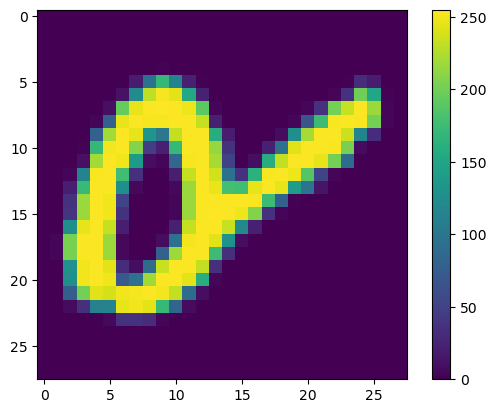

In [6]:
plt.figure()
plt.imshow(train_dataset.values[0, 1:].reshape([28, 28]))
plt.colorbar()
plt.grid(False)
plt.show()

Like the original EMNIST data, images provided here are inverted horizontally and rotated 90 anti-clockwise. We have to use the **tf.transpose** to convert the images to a human-friendlier format.

In [7]:
def show_img(data, row_num):
    img_flip = np.transpose(data.values[row_num,1:].reshape(28, 28), axes=[1,0]) # img_size * img_size arrays
    plt.title('Class: ' + str(data.values[row_num,0]) + ', Label: ' + str(class_mapping[data.values[row_num,0]]))
    plt.imshow(img_flip, cmap='Greys_r')

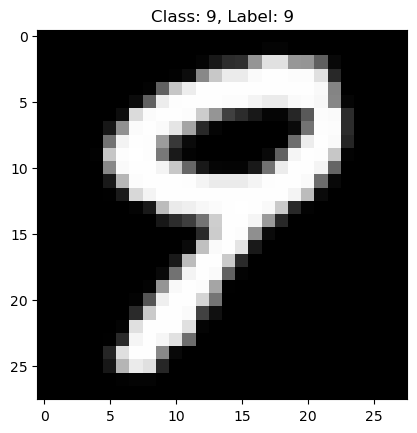

In [8]:
show_img(train_dataset,0)

Create function to split the first column from the dataset and reshape the images from 784 column to 28x28 pixels.

In [9]:
def preprocess_dataset(dataset):
    data=dataset
    labels=data.iloc[:,:1]
    images=data.iloc[:,1:]
    images=images.to_numpy()
    labels=labels.to_numpy().reshape(-1)
    
    images=np.reshape(images,(len(images),28,28))

    return images,labels

In [10]:
train_images,train_labels=preprocess_dataset(train_dataset)
test_images,test_labels=preprocess_dataset(test_dataset)

There are 240000 images in the training set, with each image represented as 28x28 pixels.

In [11]:
train_images.shape

(239999, 28, 28)

Likewise, there are 240000 labels in the training set.

In [12]:
len(train_labels)

239999

Each label is an integer between 0 and 9.

In [13]:
train_labels

array([9, 6, 3, ..., 1, 1, 0])

There are 40000 images in the test set. Again, each image is represented as 28x28 pixels.

In [14]:
test_images.shape

(39999, 28, 28)

And the test set contains 40000 images labels.

In [15]:
len(test_labels)

39999

## Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

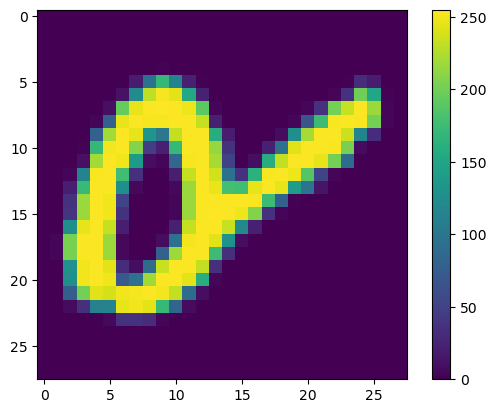

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way.

In [17]:
train_images=train_images/255.0
test_images=test_images/255.0

To verify the data is in the correct format and that you're ready yo build and train the network, let's display the first 25 images from the training set and testing set then display the class name below each image.

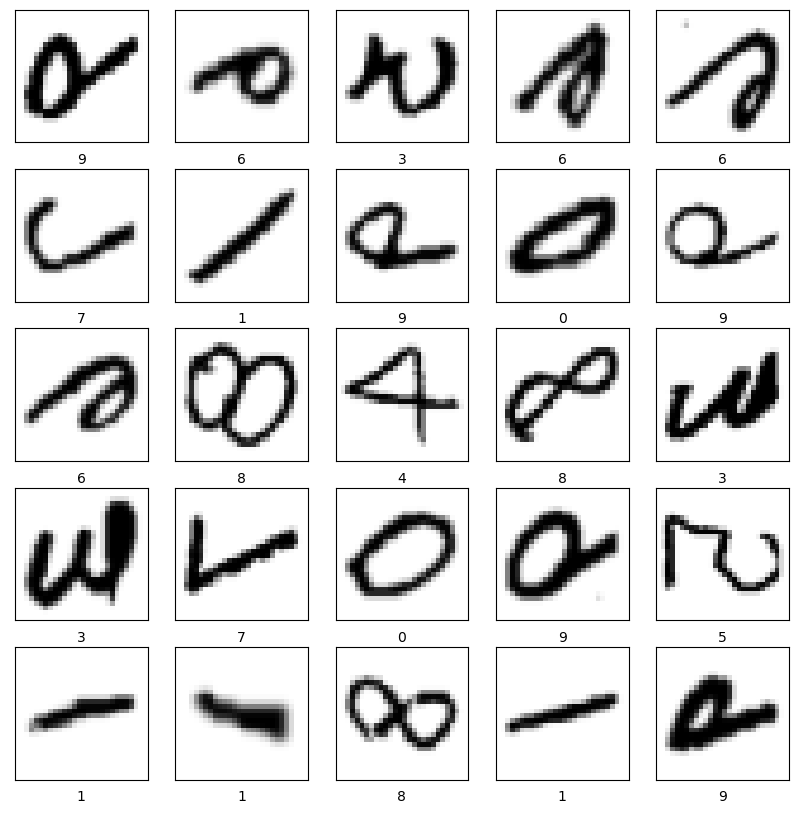

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_mapping[train_labels[i]])

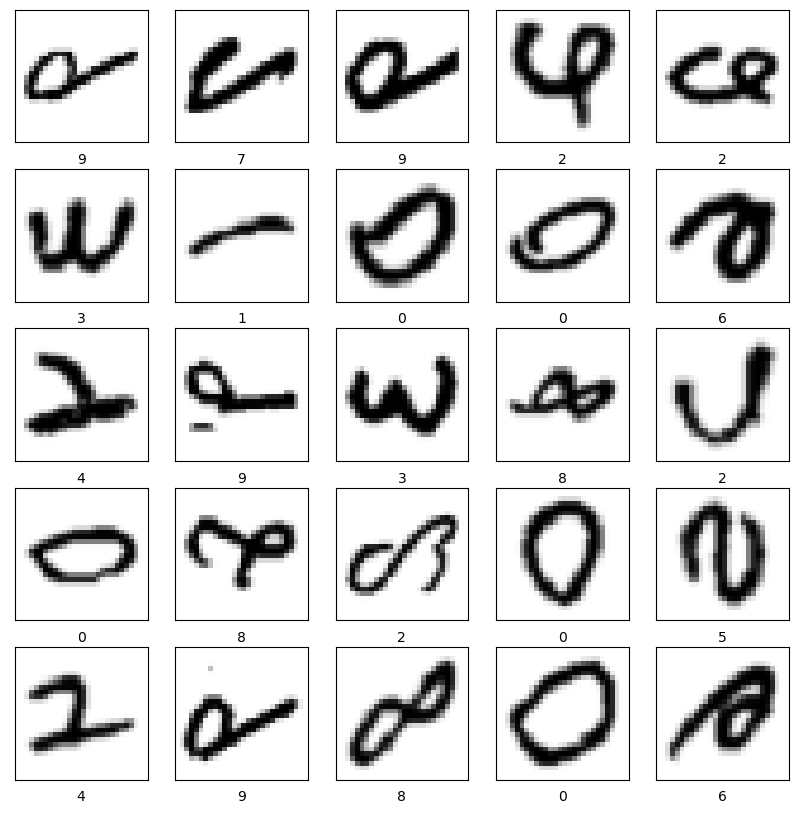

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_mapping[test_labels[i]])

Since the images are inverted horizontally and rotated 90 anti-clockwise. We use **tf.transpose** to convert the images to a human-friendlier format.

In [20]:
train_images=np.transpose(train_images,axes=[0,2,1])
test_images=np.transpose(test_images,axes=[0,2,1])

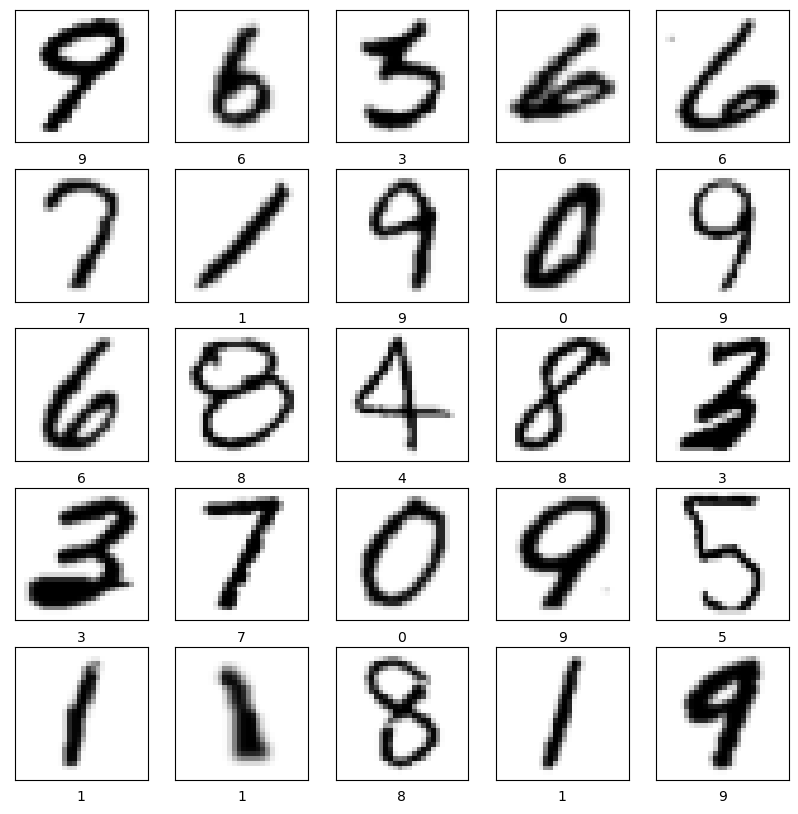

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_mapping[train_labels[i]])

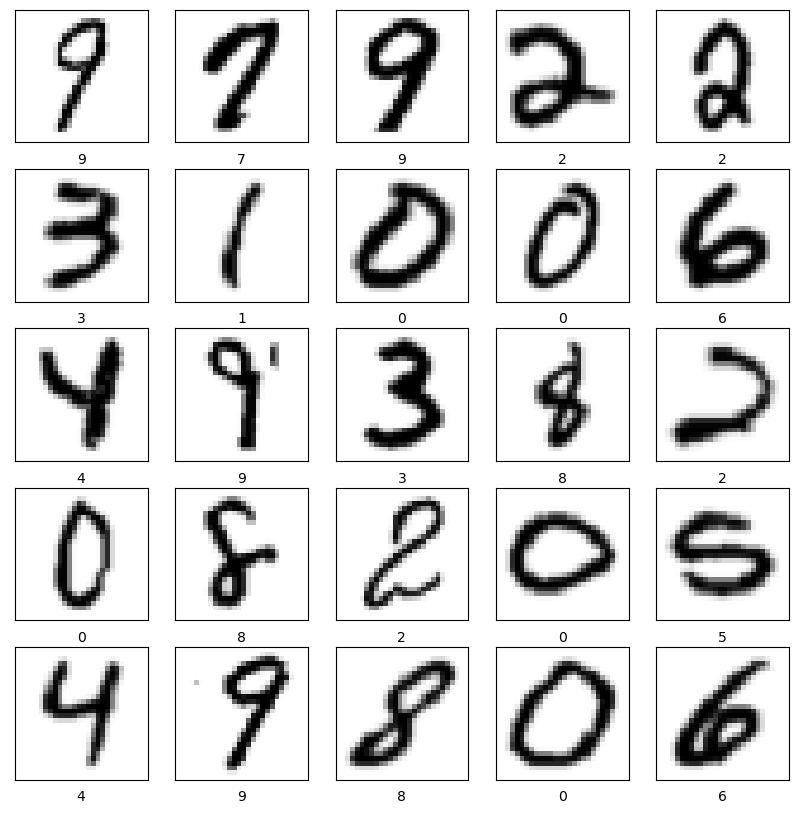

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_mapping[test_labels[i]])

The data now look perfect and can start build and train the model now.

## Build Model

Building the neural network requires configuring the layers of the mode, the compiling the model

### Set up the layers

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them.
</br></br>
Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training

In [23]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


- The first layer in the network, `tf.keras.layers.Flatten`, transoforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28*28 = 784 pixels). Think of this layers as unstacking rows of pixels in the image and lining them up. This layer has no parameter to learn; it only reformats the data
- After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layers return a logits array with length og 10. Each node contains a score indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it need a few more settings. These are added during the model's compile step:

- Loss function - This measure how accurate the model is during training. You want to minimize this function to 'steer'the model in the right direction.
- Optimizer - This is how the model is updated based on the data it sees and its loss function
- Metrics - Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [25]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

### Train and model

Training the neural network model required the following steps:
1. Feed the training data to the model.In this example, the training data is in the `train_images` and `train_labels` arrays
1. The model learns to associate images and labels.
1. You ask the model to make predictions about a test-set in this example, the `test_images` array.
1. Vefiry that the predictions match the labels from the `test_labels` array.

In [26]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
7500/7500 [==============================] - 29s 3ms/step - loss: 0.1180 - accuracy: 0.9657
Epoch 2/10
7500/7500 [==============================] - 25s 3ms/step - loss: 0.0548 - accuracy: 0.9838
Epoch 3/10
7500/7500 [==============================] - 24s 3ms/step - loss: 0.0430 - accuracy: 0.9874
Epoch 4/10
7500/7500 [==============================] - 25s 3ms/step - loss: 0.0362 - accuracy: 0.9889
Epoch 5/10
7500/7500 [==============================] - 24s 3ms/step - loss: 0.0323 - accuracy: 0.9901
Epoch 6/10
7500/7500 [==============================] - 25s 3ms/step - loss: 0.0286 - accuracy: 0.9913
Epoch 7/10
7500/7500 [==============================] - 25s 3ms/step - loss: 0.0257 - accuracy: 0.9922
Epoch 8/10
7500/7500 [==============================] - 25s 3ms/step - loss: 0.0236 - accuracy: 0.9927
Epoch 9/10
7500/7500 [==============================] - 24s 3ms/step - loss: 0.0214 - accuracy: 0.9933
Epoch 10/10
7500/7500 [==============================] - 25s 3ms/step - l

As the model trains, the loss and accuracy metrics are displayed. This model reached an accuracy of about 0.994 or (99.4%) on the training data.

### Evaluate accuracy
Next, compare how the model performs on the test dataset.

In [27]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy: ',test_acc)

1250/1250 - 3s - loss: 0.0502 - accuracy: 0.9877 - 3s/epoch - 2ms/step

Test accuracy:  0.9876747131347656


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model 'memorizes' the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

### Make predictions

With the model trained, we can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs - logits - to probabilities, which sholud be easier to interpret

In [28]:
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [29]:
predictions=probability_model.predict(test_images)

1250/1250 [==============================] - 3s 2ms/step


Here, the mode has predicted the label for each image in the testing set. Let's take a look at the first prediction

In [30]:
predictions[0]

array([1.5906859e-17, 1.0811745e-12, 1.0108698e-10, 9.5499132e-08,
       7.4571531e-08, 2.2326059e-10, 2.6696051e-24, 2.5187514e-03,
       5.4720749e-06, 9.9747556e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's 'confidence' that the image corresponds to each of the 10 different articles of digits. We can see which label has the highest confidence value:

In [31]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an digits 9. Examing the test label show that this classification is correct.

In [32]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [33]:
def plot_image(i,predictions_array,true_label,img):
    true_label,img=true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions_array)
    if predicted_label==true_label:
        color="blue"
    else:
        color='red'
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                         100*np.max(predictions_array),
                                         true_label),
                                         color=color)
    
    
def plot_value_array(i,predictions_array,true_label):
    true_label=true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color='#777777')
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Verify predicionts

With the model trained, you can use it to make predictions about some images

Let's look at the 0th images, predictions and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

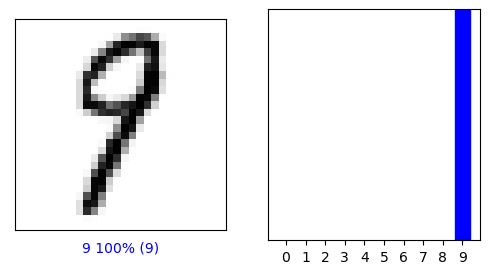

In [34]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

Let's plot several images with their predicionts. Note that the model can be wrong even when very confident.

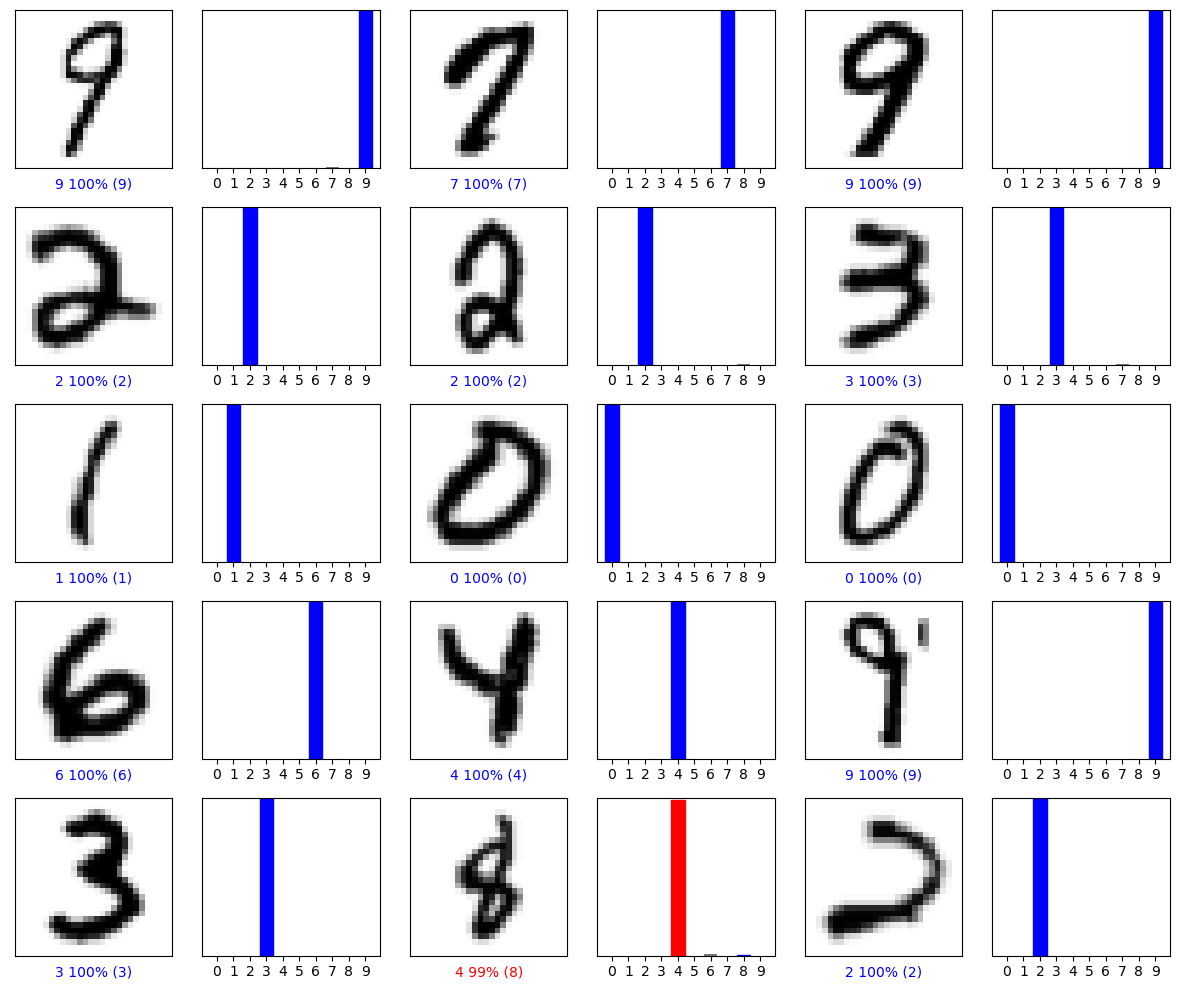

In [35]:
num_rows=5
num_cols=3
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

### Use the trained mode

Finally, use the trained model to make a prediction about a single image

In [36]:
img=test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a batch or collection of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [37]:
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


Now, predict the correct label for this image

In [38]:
predictions_single=probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 27ms/step
[[6.0126859e-10 2.6936873e-12 7.8932860e-09 9.1120666e-13 1.5993184e-08
  3.9308341e-13 1.3395815e-17 9.9999988e-01 1.9621575e-09 9.5894329e-08]]


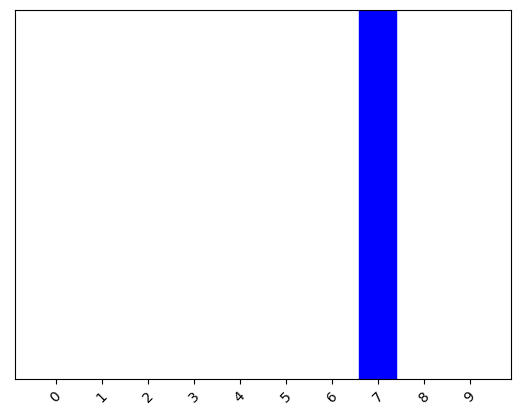

In [39]:
plot_value_array(1,predictions_single[0],test_labels)
_=plt.xticks(range(10),class_mapping,rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists - one list for each image in the batch of data. Grab the predictions for our (only) image in the batch

In [40]:
np.argmax(predictions_single[0])

7

## Expert Image Classification

Use `tf.data` to batch and shuffle the dataset

In [41]:
train_images=train_images[...,tf.newaxis].astype('float32')
test_images=test_images[...,tf.newaxis].astype('float32')

train_ds = tf.data.Dataset.from_tensor_slices(
    (train_images, train_labels)).shuffle(1000).batch(32)
test_ds=tf.data.Dataset.from_tensor_slices((test_images,test_labels)).batch(32)

Build the `tf.keras` mode using the Keras **model subclassing API:**

In [42]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = tf.keras.layers.Conv2D(32, 3, activation='relu')
    self.flatten = tf.keras.layers.Flatten()
    self.d1 = tf.keras.layers.Dense(128, activation='relu')
    self.d2 = tf.keras.layers.Dense(10)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
model = MyModel()

Choose an optimizer and loss function for training:

In [43]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

Select metrics to measure the loss and the accuracy of the mode. These metrics accumulate the values over epochs and then print the overall result

In [44]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

Use `tf.GradientTape` to train the model:

In [45]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

Test the model

In [46]:
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [47]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

Epoch 1, Loss: 0.06702598184347153, Accuracy: 98.01832580566406, Test Loss: 0.04311003535985947, Test Accuracy: 98.65996551513672
Epoch 2, Loss: 0.025795945897698402, Accuracy: 99.22749328613281, Test Loss: 0.03374321758747101, Test Accuracy: 99.03497314453125
Epoch 3, Loss: 0.01383558101952076, Accuracy: 99.57624816894531, Test Loss: 0.03474986553192139, Test Accuracy: 99.17498016357422
Epoch 4, Loss: 0.009215491823852062, Accuracy: 99.71500396728516, Test Loss: 0.04668563976883888, Test Accuracy: 98.97997283935547
Epoch 5, Loss: 0.006648952141404152, Accuracy: 99.77999877929688, Test Loss: 0.04241768643260002, Test Accuracy: 99.17498016357422


The image classifier is now trained to ~99% accuracy on this dataset.